In [91]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version  -  1.20.1
pandas version -  1.2.4


- pie : 카테고리값의 상대적인 비교

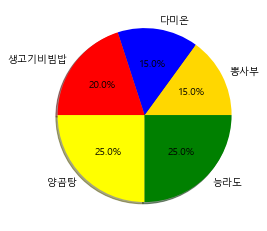

In [92]:
labels = ['뽕사부' , '다미온' , '생고기비빔밥' , '양곰탕' , '능라도']
datas  = [15, 15, 20, 25, 25]
colors = ['gold' , 'blue' , 'red' , 'yellow' , 'green']

plt.figure()


plt.pie(datas , labels = labels , colors = colors , shadow = True , autopct='%1.1f%%')

plt.show()
plt.close()


In [93]:
dataset = pd.read_csv('./data/auto-mpg.csv' , header = None )
dataset.columns = ['mpg' , 'cyl' , 'disp' , 'horsepower' , 'weight' , 'acc' , 'year' , 'origin' , 'name']
dataset['cnt'] = 1
dataset

,mpg,cyl,disp,horsepower,weight,acc,year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [94]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print()
origin_grp_frm  = dataset.groupby('origin').sum()
origin_grp_frm.index = ['USA' , 'EU' , 'KOR']
origin_grp_frm

제조국으로 그룹을 지어서 라벨인덱스 변경 - 



,mpg,cyl,disp,weight,acc,year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOR,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [95]:
print('실린더로 그룹을 지어서 라벨인덱스 변경 - 예시) cyl3 , cyl4')
print()
cyl_grp_frm  = dataset.groupby('cyl').sum()
cyl_grp_frm.index = ['cyl3' , 'cyl4' , 'cyl5' , 'cyl6' , 'cyl8']
cyl_grp_frm

실린더로 그룹을 지어서 라벨인덱스 변경 - 예시) cyl3 , cyl4



,mpg,disp,weight,acc,year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


제조국별 차량 생산량을 파이로 구현한다면? - 



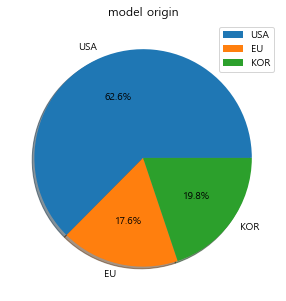

In [96]:
print('제조국별 차량 생산량을 파이로 구현한다면? - ')
print()

plt.figure(figsize=(10, 5))


plt.pie(origin_grp_frm['cnt'] , labels = origin_grp_frm.index , shadow = True , autopct='%1.1f%%')

plt.title('model origin')
plt.legend(labels = origin_grp_frm.index , loc='best')

plt.show()
plt.close()



In [97]:
print('제조국과 실린더별 파이구현 - ')
print('조건 - subplot 구현 (1,2)')
print()

제조국과 실린더별 파이구현 - 
조건 - subplot 구현 (1,2)



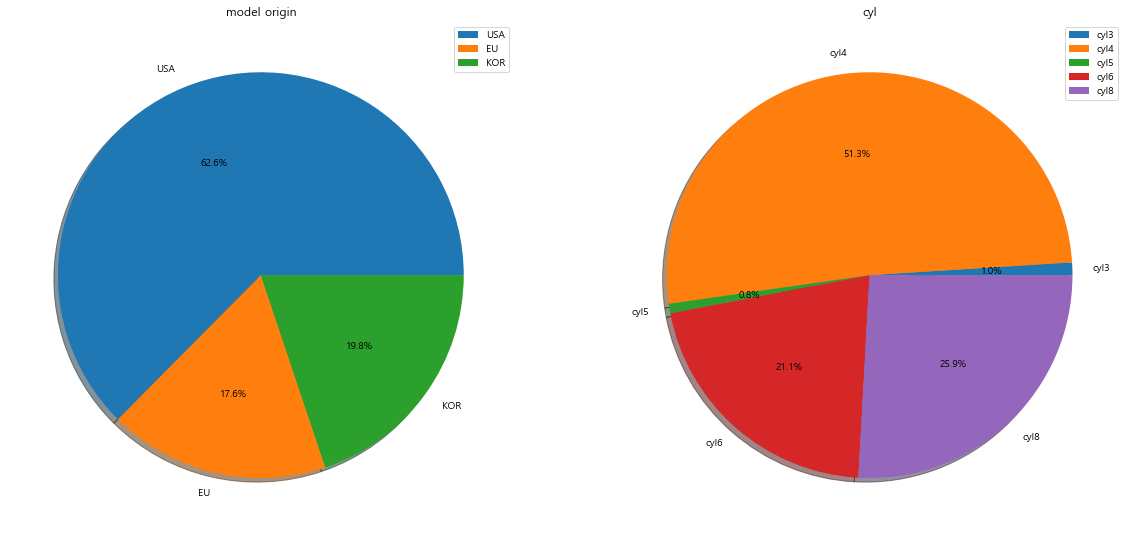

In [98]:
fig = plt.figure(figsize = (20, 10))

ax01 = fig.add_subplot(1, 2, 1)
ax02 = fig.add_subplot(1, 2, 2)


ax01.pie(origin_grp_frm['cnt'] , labels = origin_grp_frm.index , shadow = True , autopct='%1.1f%%')
ax01.set_title('model origin')
ax01.legend(labels = origin_grp_frm.index , loc='best')

ax02.pie(cyl_grp_frm['cnt'] , labels = cyl_grp_frm.index , shadow = True , autopct='%1.1f%%')
ax02.set_title('cyl')
ax02.legend(labels = cyl_grp_frm.index , loc='best')

plt.show()
plt.close()

- histogram : 구간데 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도수를 시각화할 때 사용한다    

type -  <class 'numpy.ndarray'>



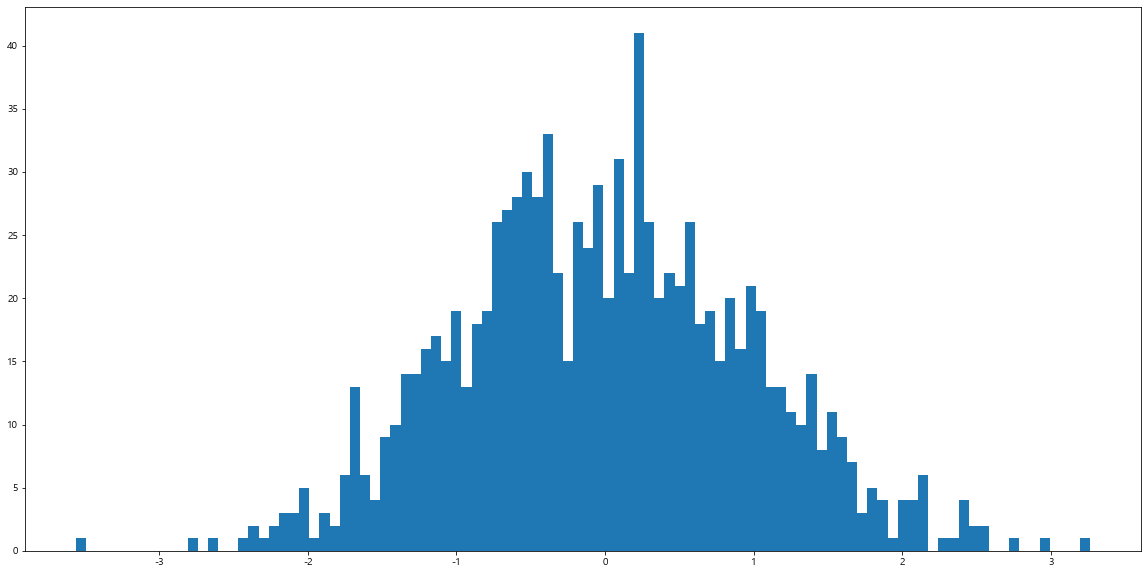

In [99]:
datas = np.random.randn(1000)
print('type - ' , type(datas))
print()

fig = plt.figure(figsize = (20, 10))

plt.hist(datas , bins = 100)

plt.show()
plt.close()

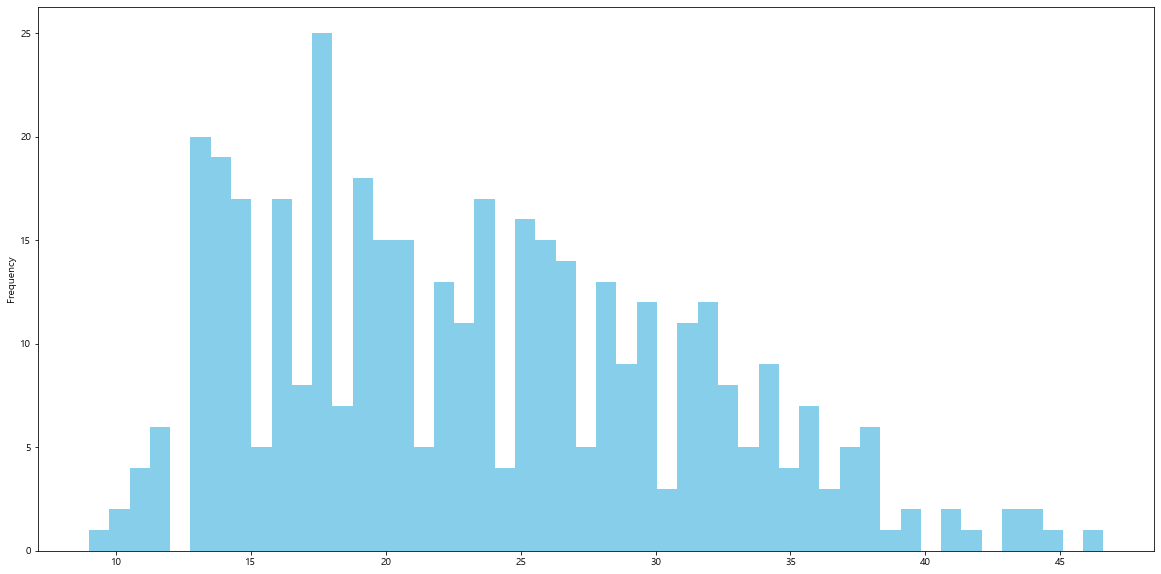

In [100]:

fig = plt.figure(figsize = (20, 10))

# plt.hist(dataset['mpg'] , bins = 50)

dataset['mpg'].plot(kind='hist' , bins=50 , color = 'skyblue') 

plt.show()
plt.close()


### koweps_visualization.xlsx [실습]

In [102]:
koweps_dataset = pd.read_excel('./data/koweps_visualization.xlsx')
koweps_dataset

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


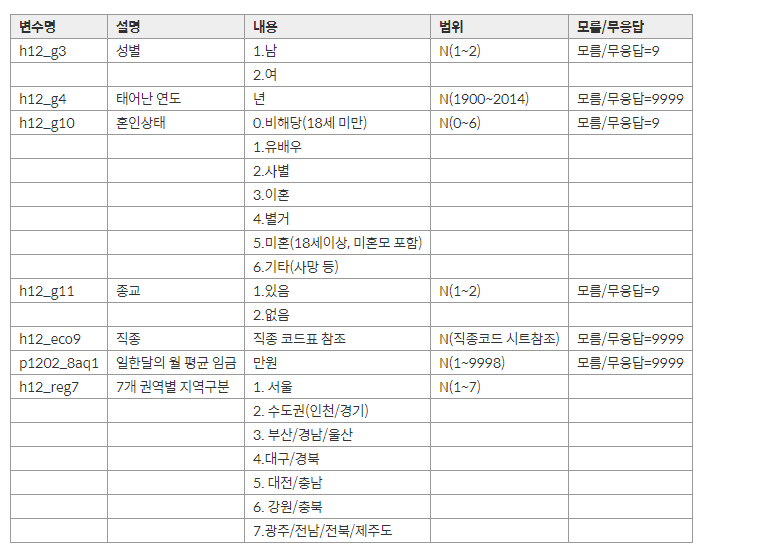

In [127]:
from IPython.display import Image
Image('./data/koweps_img.png', width = 700)

In [128]:
koweps = koweps_dataset.copy()

In [129]:
koweps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [130]:
koweps_frm = koweps[['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']]
koweps_frm.columns = ['성별' , '태어난 연도' , '혼인상태' , '종교' , '직종' , '일한달의 월 평균 임금' , '7개 권역별 지역구분']
koweps_frm

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [131]:
koweps_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            15422 non-null  int64  
 1   태어난 연도        15422 non-null  int64  
 2   혼인상태          15422 non-null  int64  
 3   종교            15422 non-null  int64  
 4   직종            7131 non-null   float64
 5   일한달의 월 평균 임금  4507 non-null   float64
 6   7개 권역별 지역구분   15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [132]:
print('조사 대상자들에 대한 성별 분포를 막대그래프로 시각화 한다면? - ')
koweps_frm.filter(['성별'])


조사 대상자들에 대한 성별 분포를 막대그래프로 시각화 한다면? - 


,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [133]:
print('np.where() - ')

print('case01 - ')
print()
koweps_frm['성별2'] = koweps_frm['성별'].apply(lambda x : '남자' if x==1 else '여자')
koweps_frm

np.where() - 
case01 - 



,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자
...,...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5,여자
15418,2,1992,5,1,NaN,NaN,5,여자
15419,1,1995,5,1,521.0,72.0,5,남자
15420,2,1998,5,1,432.0,NaN,5,여자


In [134]:
print('case02 - ')
print()
koweps_frm['성별3'] = np.where(koweps_frm.filter(['성별']) == 1 , '남자' , '여자')
koweps_frm

case02 - 



,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2,성별3
0,2,1936,2,2,NaN,NaN,1,여자,여자
1,2,1945,2,2,NaN,NaN,1,여자,여자
2,1,1948,2,2,NaN,NaN,1,남자,남자
3,1,1942,3,1,762.0,108.9,1,남자,남자
4,2,1923,2,1,NaN,NaN,1,여자,여자
...,...,...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5,여자,여자
15418,2,1992,5,1,NaN,NaN,5,여자,여자
15419,1,1995,5,1,521.0,72.0,5,남자,남자
15420,2,1998,5,1,432.0,NaN,5,여자,여자


In [135]:
print('결측값 확인 - ')
koweps_frm.isna().sum()

결측값 확인 - 


성별                  0
태어난 연도              0
혼인상태                0
종교                  0
직종               8291
일한달의 월 평균 임금    10915
7개 권역별 지역구분         0
성별2                 0
성별3                 0
dtype: int64

In [136]:
print('성별의 빈도 확인 - ')
gender_frm = pd.DataFrame( koweps_frm['성별2'].value_counts() )
gender_frm.rename(columns = {'성별2' : '명'} , inplace = True)
gender_frm

성별의 빈도 확인 - 


,명
여자,8440
남자,6982


성별 분포에 따른 시각화 - bar 



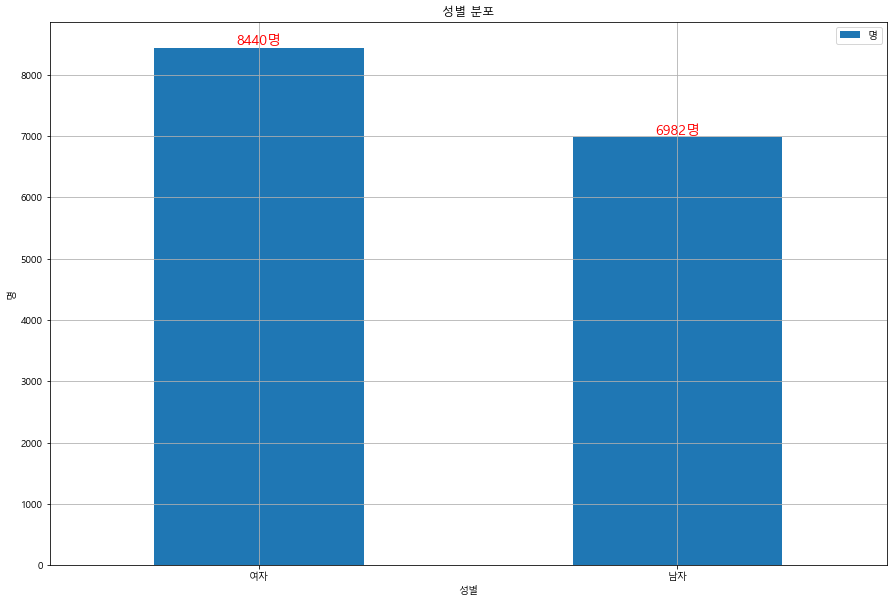

In [137]:
print('성별 분포에 따른 시각화 - bar ')
print()

# plt.figure(figsize = (15, 10))

gender_frm.plot(kind='bar' , rot = 0 , figsize = (15, 10))
plt.grid()

plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate( list(gender_frm['명']) ) :
    txt = '%d명' % value    
    plt.text(idx , value , txt , 
            horizontalalignment='center' ,
            verticalalignment='bottom' ,
            fontsize = 14 , 
            color = 'red')


plt.show()
plt.close()



성별 분포에 따른 시각화 - pie 



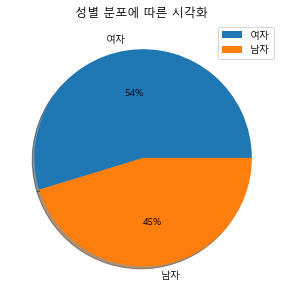

In [138]:
print('성별 분포에 따른 시각화 - pie ')
print()

plt.figure(figsize=(10, 5))


plt.pie(gender_frm['명'] , labels = gender_frm.index , shadow = True , autopct='%d%%')

plt.title('성별 분포에 따른 시각화 ')
plt.legend(labels = gender_frm.index , loc='best')

plt.show()
plt.close()

